In [1]:
#using Pkg
#Pkg.instantiate()

In [2]:
#import Pkg
#Pkg.add("LightGraphs")
#Pkg.add("Plots")

In [3]:
using ComplexSystems, LightGraphs, DelimitedFiles, Plots

In [4]:
function degree_dist(p,k_max)
    pk = zeros(k_max)
    for k in 0:(k_max-1)
        pk[k+1] = (1-exp(-p))*exp(-p*k)
    end
    pk
end

degree_dist (generic function with 1 method)

In [5]:
function CDMX_configuration(x;k_max,prop_deg,R0=2.83,Dinf=2.9,Dincub=5.2,Drl=11.1,Dhosp=5,Drh=15,Duci=2,Druci=10,Dm=4,pgrav=0.15,puci=0.05,pm=0.035)
    y = zeros(length(x))
    
    susceptibles = x[1:k_max]
    infecciosos = x[k_max+1:2*k_max]
    expuestos = x[2*k_max+1:3*k_max]
    leve = x[3*k_max+1:4*k_max]
    grave = x[4*k_max+1:5*k_max]
    hospitalizados = x[5*k_max+1:6*k_max]
    uci = x[6*k_max+1:7*k_max]
    recupuperados = x[7*k_max+1:8*k_max]
    muertos = x[8*k_max+1:end]

    avg_k = collect(1:k_max) .* prop_deg |> sum
    further = collect(1:k_max) .* prop_deg .* expuestos |> sum
    θ = further/avg_k
    for k in 1:k_max
        
        d_sus = -(R0/Dinf)*infecciosos[k]*susceptibles[k]
        d_exp =  (R0/Dinf)*infecciosos[k]*susceptibles[k]-(1/Dincub)*expuestos[k]
        d_inf =  (1/Dincub)*expuestos[k]-(1/Dinf)*infecciosos[k]
        d_leve = (1-pgrav)*(1/Dinf)*infecciosos[k]-(1/Drl)*leve[k]
        d_grav =  pgrav*(1/Dinf)*infecciosos[k]-(1/Dhosp)*grave[k]
        d_hosp = (1/Dhosp)*grave[k]-(1-puci)*(1/Drh)*hospitalizados[k]-puci*(1/Duci)*hospitalizados[k]
        d_uci =   puci*(1/Duci)*hospitalizados[k]-(1-pm)*(1/Druci)*uci[k]-pm*(1/Dm)*uci[k]
        d_rec =  (1/Drl)*leve[k]+(1-puci)*(1/Drh)*hospitalizados[k]+(1-pm)*(1/Druci)*uci[k]
        d_mue =   pm*(1/Dm)*uci[k]
        
        y[k] = d_sus
        y[k_max+k] = d_inf
        y[2*k_max+k] = d_exp
        y[3*k_max+k] = d_leve
        y[4*k_max+k] = d_grav
        y[5*k_max+k] = d_hosp
        y[6*k_max+k] = d_uci
        y[7*k_max+k] = d_rec
        y[8*k_max+k] = d_mue
    end
    y
end

CDMX_configuration (generic function with 1 method)

In [6]:
function make_proportions(compart_num,init_infect)
    susceptible = 1 .- init_infect
    initial = vcat(susceptible, init_infect)
    if compart_num > 2
        for compart in 1:compart_num-2
            initial = vcat(initial, zeros(length(init_infect)))
        end
    end
    initial
end

make_proportions (generic function with 1 method)

In [7]:
kmax = 200
infec = rand(kmax)
all = sum(infec)
prop_inf = infec/all
k_max=kmax;

In [8]:
prop_inf

200-element Array{Float64,1}:
 0.004602683312620129  
 0.0027358035645121833 
 0.0024928509906250017 
 0.00012946922554562846
 0.002298048819545151  
 0.00017650893365476767
 0.0004994732264009565 
 0.01012910660438427   
 0.007685540015985839  
 0.00914819256427679   
 0.004761899001866372  
 0.007729258566315893  
 0.004482035557398642  
 ⋮                     
 0.002275162442855439  
 0.0044523836841376145 
 0.0074386861377241965 
 0.010078674573858366  
 0.00720568434249112   
 0.0006549049940075566 
 0.0067013463744478455 
 0.007703957339217036  
 0.006443787985073114  
 0.002534298347896915  
 0.008436622929303621  
 0.007327113311815078  

In [9]:
prop_inf .* collect(1:kmax)

200-element Array{Float64,1}:
 0.004602683312620129 
 0.005471607129024367 
 0.007478552971875005 
 0.0005178769021825138
 0.011490244097725755 
 0.001059053601928606 
 0.003496312584806696 
 0.08103285283507417  
 0.06916986014387255  
 0.0914819256427679   
 0.05238088902053009  
 0.09275110279579071  
 0.05826646224618234  
 ⋮                    
 0.43000570169967794  
 0.8459528999861468   
 1.4207890523053215   
 1.9351055181808063   
 1.3906970781007861   
 0.127051568837466    
 1.30676254301733     
 1.509975638486539    
 1.2694262330594035   
 0.5017910728835893   
 1.6788879629314206   
 1.4654226623630155   

In [10]:
#para qué quiere saber esto?
prop_inf .* collect(1:kmax) |> sum

101.59887468001749

In [11]:
the_proportions = make_proportions(9,prop_inf);
the_proportions

1800-element Array{Float64,1}:
 0.9953973166873799
 0.9972641964354878
 0.997507149009375 
 0.9998705307744544
 0.9977019511804548
 0.9998234910663453
 0.999500526773599 
 0.9898708933956157
 0.9923144599840141
 0.9908518074357232
 0.9952381009981336
 0.9922707414336841
 0.9955179644426013
 ⋮                 
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               

In [12]:
pd = degree_dist(0.4,kmax)
sum(pd)

0.9999999999999999

In [13]:
pd .* collect(1:kmax) |> sum

3.033244781719736

In [14]:
t1,y1 = my_integrator(0,100,1,the_proportions;fun=CDMX_configuration,algo=heun,k_max=kmax,prop_deg=pd,R0=2.83,Dinf=2.9,Dincub=5.2,Drl=11.1,Dhosp=5,Drh=15,Duci=2,Druci=14,Dm=4,pgrav=0.15,puci=0.05,pm=0.035)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [0.995397 0.997264 … 0.0 0.0; 0.991704 0.995063 … 0.0 0.0; … ; 0.0722574 0.0724444 … 0.00421215 0.00419913; 0.0722532 0.0724379 … 0.0042262 0.0042139])

In [15]:
size(y1)

(101, 1800)

In [16]:
y1[3,:]

1800-element Array{Float64,1}:
 0.988426864862567    
 0.9931065298514      
 0.9937169839257504   
 0.9996728136747935   
 0.9942066947216215   
 0.9995539615957223   
 0.9987382896820715   
 0.9746888818691727   
 0.9807421536431554   
 0.9771148198627299   
 0.9880286737924419   
 0.9806335592970442   
 0.9887286945773474   
 ⋮                    
 1.287133925106795e-9 
 2.5188593040649226e-9
 4.208308429208194e-9 
 5.701836369909099e-9 
 4.0764916808274125e-9
 3.705012088943613e-10
 3.7911711708891376e-9
 4.358381037811363e-9 
 3.645461952762269e-9 
 1.4337355955235784e-9
 4.772873963237502e-9 
 4.145188026619523e-9 

In [17]:
susceptibles = sum(y1[:,1:kmax] .* pd',dims=2)
infecciosos = sum(y1[:,kmax+1:2*kmax] .* pd',dims=2)
expuestos = sum(y1[:,2*kmax+1:3*kmax] .* pd',dims=2)
leve = sum(y1[:,3*kmax+1:4*kmax] .* pd',dims=2)
grave = sum(y1[:,4*kmax+1:5*kmax] .* pd',dims=2)
hospitalizados = sum(y1[:,5*kmax+1:6*kmax] .* pd',dims=2)
uci = sum(y1[:,6*kmax+1:7*kmax] .* pd',dims=2)
recuperados = sum(y1[:,7*kmax+1:8*kmax] .* pd',dims=2)
muertos = sum(y1[:,8*kmax+1:9*kmax] .* pd',dims=2);

In [18]:
susceptibles

101×1 Array{Float64,2}:
 0.9968259773924865 
 0.9942784906459963 
 0.9920179778324997 
 0.9897544762082358 
 0.9873039533928019 
 0.9845353971425672 
 0.9813418694724276 
 0.9776244521328545 
 0.9732832145946727 
 0.9682121037452802 
 0.9622961519958712 
 0.9554102242419225 
 0.9474189857602565 
 ⋮                  
 0.07277449438654131
 0.07272327102900267
 0.07267826453385749
 0.07263871749918416
 0.07260396545028366
 0.07257342529105809
 0.07254658522336857
 0.07252299594065151
 0.07250226292911868
 0.07248403973285339
 0.07246802205869605
 0.07245394261353269

In [31]:
poblacion = 22000000

22000000

In [32]:
#Pkg.add("Plots")

In [33]:
#Pkg.update()

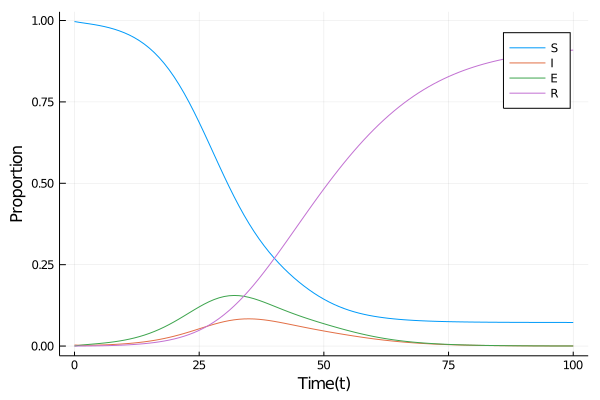

In [34]:
using Plots
p1=Plots.plot(t1,susceptibles,label="S",xaxis="Time(t)",yaxis="Proportion")
Plots.plot!(t1,infecciosos,label="I")
Plots.plot!(t1,expuestos,label="E")
Plots.plot!(t1,recuperados,label="R")

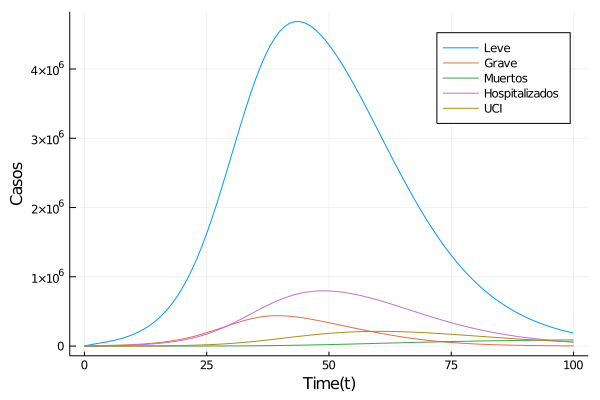

In [35]:
p1=Plots.plot(t1,leve*poblacion,label="Leve",xaxis="Time(t)",yaxis="Casos")
Plots.plot!(t1,grave*poblacion,label="Grave")
Plots.plot!(t1,muertos*poblacion,label="Muertos")
Plots.plot!(t1,hospitalizados*poblacion,label="Hospitalizados")
Plots.plot!(t1,uci*poblacion,label="UCI")

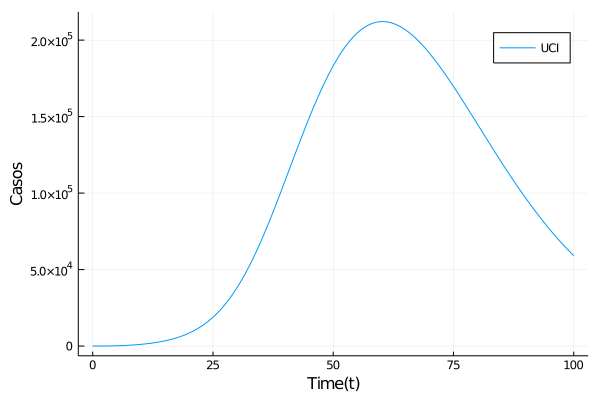

In [36]:
Plots.plot(t1,uci*poblacion,label="UCI",xaxis="Time(t)",yaxis="Casos")

In [37]:
maximum(uci*poblacion)

212141.0376109275

In [40]:
maximum(muertos*poblacion)

88946.83269412079

In [26]:
function d_model(x)
    -0.3 .* x
end

d_model (generic function with 1 method)

In [27]:
d_model([1,2])

2-element Array{Float64,1}:
 -0.3
 -0.6

In [28]:
t,y = my_integrator(0, 100, 1, 5,  fun=d_model, algo=heun)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [5.0; 3.725; … ; 1.10266e-12; 8.21481e-13])

In [29]:
y

101×1 Array{Float64,2}:
 5.0                   
 3.725                 
 2.775125              
 2.067468125           
 1.540263753125        
 1.147496496078125     
 0.8548848895782032    
 0.6368892427357613    
 0.4744824858381422    
 0.35348945194941594   
 0.2633496417023149    
 0.1961954830682246    
 0.14616563488582734   
 ⋮                     
 2.093525614677994e-11 
 1.5596765829351054e-11
 1.1619590542866535e-11
 8.656594954435568e-12 
 6.449163241054498e-12 
 4.804626614585601e-12 
 3.579446827866273e-12 
 2.6666878867603735e-12
 1.9866824756364783e-12
 1.4800784443491764e-12
 1.1026584410401365e-12
 8.214805385749017e-13 

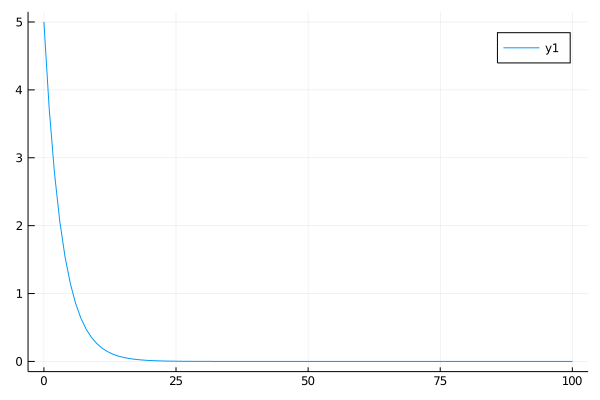

In [30]:
Plots.plot(t,y)